In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

q = np.load('results/best_q_table.npy')

In [2]:
# q = np.load('models/double_best_model_q.npy')
# q = q[:,0,:,:]


In [3]:
print(q.shape)

(2, 24, 3)


In [4]:
def plot_q_table(q_table, title="Q-Table Visualization"):
    """
    Plot Q-table where:
    - First dimension (4): Storage level bins
    - Second dimension (24): Hours
    - Third dimension (3): Actions (buy/hold/sell) shown as RGB intensity
    """
    # Create figure with 3 subplots (one for each action)
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, y=0.95)
    
    action_names = ['Buy', 'Hold', 'Sell']
    
    # Plot heatmap for each action
    for action_idx, (ax, action_name) in enumerate(zip(axes, action_names)):
        sns.heatmap(q_table[:, :, action_idx],
                   ax=ax,
                   cmap='RdYlBu_r',
                   cbar_kws={'label': 'Q-Value'},
                   xticklabels=range(24),  # Hours
                   yticklabels=['Low', 'High'])  # Storage levels
        
        ax.set_title(f'Action: {action_name}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Storage Level')
    
    plt.tight_layout()
    plt.show()

def plot_optimal_actions(q_table, title="Optimal Actions", text=False):
    """
    Plot optimal actions where color represents the chosen action
    and intensity represents the Q-value magnitude
    """
    # Get optimal actions and their values
    optimal_actions = np.argmax(q_table, axis=2)
    optimal_values = np.max(q_table, axis=2)
    
    # Create a custom colormap
    colors = ['tab:blue', 'tab:green', 'tab:red']  # buy, hold, sell
    n_bins = 256
    cmap = plt.cm.get_cmap('RdYlGn', 3)
    spaces= " " * 32
    
    plt.figure(figsize=(12, 6))
    plt.title(title)
    
    # Plot heatmap
    sns.heatmap(optimal_actions,
                cmap=colors,
                cbar_kws={'label': 'Hold' + spaces + 'Sell' + spaces + 'Buy', 'ticks': [0, -1, 1]},
                xticklabels=range(24),
                yticklabels=['Low',  'High'])
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Storage Level')
    
    if text:
        # Add text annotations with Q-values
        for i in range(optimal_actions.shape[0]):
            for j in range(optimal_actions.shape[1]):
                action = optimal_actions[i, j]
                value = optimal_values[i, j]
                plt.text(j + 0.5, i + 0.5, f'{value:.1f}',
                        ha='center', va='center',
                        color='black' if 0.2 < value < 0.8 else 'white')
    
    plt.tight_layout()
    plt.show()


# You can also create an animated version to show learning progress:
def plot_q_table_animation(q_table_history, interval=500):
    """
    Create an animation of Q-table evolution
    q_table_history should be a list of Q-tables
    """
    from matplotlib.animation import FuncAnimation
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    fig.suptitle("Q-Table Evolution", fontsize=16, y=0.95)
    
    action_names = ['Buy', 'Hold', 'Sell']
    images = []
    
    vmin = min(table.min() for table in q_table_history)
    vmax = max(table.max() for table in q_table_history)
    
    def update(frame):
        fig.suptitle(f"Q-Table Evolution (Step {frame})", fontsize=16, y=0.95)
        for ax, action_idx, action_name in zip(axes, range(3), action_names):
            ax.clear()
            sns.heatmap(q_table_history[frame][:, :, action_idx],
                       ax=ax,
                       cmap='RdYlBu_r',
                       vmin=vmin,
                       vmax=vmax,
                       cbar_kws={'label': 'Q-Value'},
                       xticklabels=range(24),
                       yticklabels=['Low', 'High'])
            ax.set_title(f'Action: {action_name}')
            ax.set_xlabel('Hour of Day')
            ax.set_ylabel('Storage Level')
    
    anim = FuncAnimation(fig, update,
                        frames=len(q_table_history),
                        interval=interval,
                        repeat=False)
    
    plt.tight_layout()
    plt.show()
    
    return anim


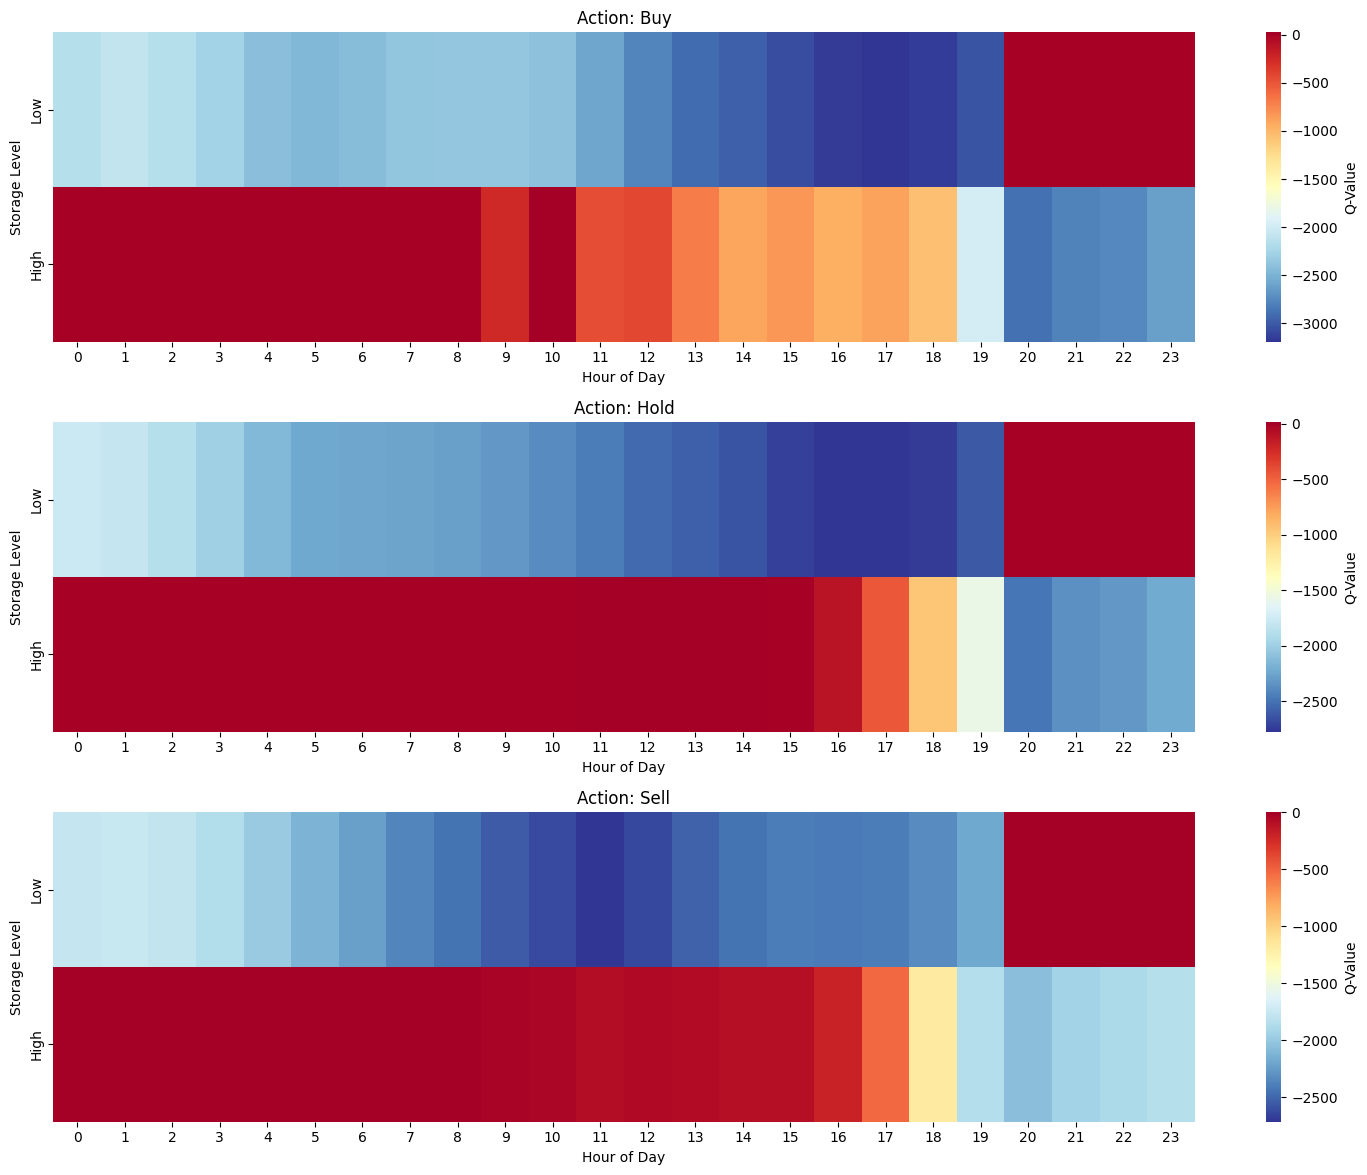

In [5]:
plot_q_table(q, title="")

/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2798/2477928360.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', 3)


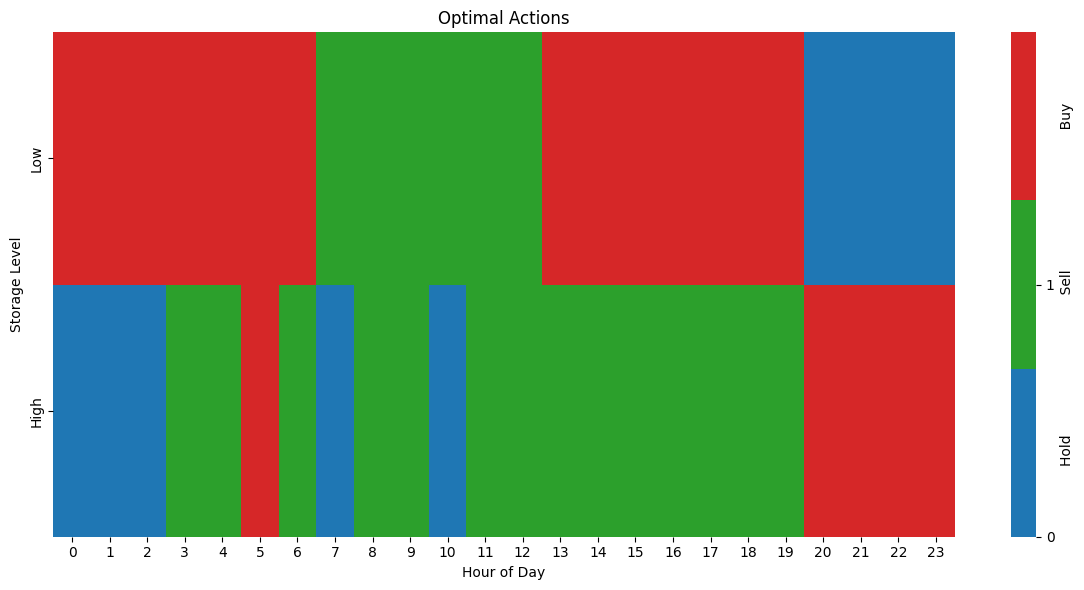

In [6]:
plot_optimal_actions(q)